In [1]:
# Import the libraries you'll need
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# df = pd.read_excel("E:/Je respire/解析/1. 脳血流と問題カテゴリの関連.xlsx", sheet_name="ディアビアイ")
# df = pd.read_excel("E:/Je respire/解析/1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")
# df = pd.read_excel("/root/workspace/1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")
df = pd. read_excel('/root/workspace/深層学習.xlsx')

In [3]:
df.columns

Index(['number', 'Q_number', 'is_correct', 'Q_group', 'left_x', 'left_y',
       'right_x', 'right_y', 'left_pupil', 'right_pupil'],
      dtype='object')

In [4]:
df = df.drop(columns=['number', 'Q_number', 'Q_group']) #前半部分

In [5]:
df['is_correct'] = df['is_correct'].replace(2, 1)

In [6]:
df.columns

Index(['is_correct', 'left_x', 'left_y', 'right_x', 'right_y', 'left_pupil',
       'right_pupil'],
      dtype='object')

In [7]:
X = df.drop(columns=['is_correct'])
y = df['is_correct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = lgb.LGBMClassifier(random_state=42, objective='binary', is_unbalance=True)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 61522, number of negative: 25919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 87441, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703583 -> initscore=0.864419
[LightGBM] [Info] Start training from score 0.864419


LGBMClassifier(is_unbalance=True, objective='binary', random_state=42)

In [8]:
# Define hyperparameter search space
param_dist = {
    "num_leaves": optuna.distributions.IntDistribution(10, 200),
    "max_depth": optuna.distributions.IntDistribution(1, 30),
    "learning_rate": optuna.distributions.FloatDistribution(1e-4, 0.5, log=True),
    "n_estimators": optuna.distributions.IntDistribution(10, 500),
    "subsample": optuna.distributions.FloatDistribution(0.1, 1.0),
    "colsample_bytree": optuna.distributions.FloatDistribution(0.1, 1.0)
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

optuna_search = OptunaSearchCV(
    model,
    param_dist,
    cv=cv, # 交差検証の設定
    n_trials=100, # トライアル回数
    scoring='accuracy', # 評価指標
    n_jobs=-1 # 計算するコアの数
)

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.


In [9]:
optuna_search.fit(X_train, y_train) # モデルの学習
y_pred = optuna_search.predict(X_test) # テストデータに対する予測

[I 2025-09-24 05:16:08,494] A new study created in memory with name: no-name-84e4836d-0fe9-4205-9ef8-4078959e8432


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:16:11,096] Trial 4 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 140, 'max_depth': 2, 'learning_rate': 0.00024415848152320544, 'n_estimators': 285, 'subsample': 0.6747920907867568, 'colsample_bytree': 0.7438956282291547}. Best is trial 4 with value: 0.7035829874778008.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 

[I 2025-09-24 05:16:12,529] Trial 5 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 73, 'max_depth': 28, 'learning_rate': 0.0017587024662122355, 'n_estimators': 80, 'subsample': 0.6646449438525253, 'colsample_bytree': 0.7174463646392975}. Best is trial 4 with value: 0.7035829874778008.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-09-24 05:16:13,459] Trial 3 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 194, 'max_depth': 5, 'learning_rate': 0.0011535076651773121, 'n_estimators': 273, 'subsample': 0.5881921770490671, 'colsample_bytree': 0.12039971133059407}. Best is trial 4 with value: 0.7035829874778008.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:16:14,258] Trial 0 finished with value: 0.7466977959490408 and parameters: {'num_leaves': 174, 'max_depth': 22, 'learning_rate': 0.007514864751158761, 'n_estimators': 59, 'subsample': 0.602002199110348, 'colsample_bytree': 0.7880761300783609}. Best is trial 0 with value: 0.7466977959490408.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:16:19,279] Trial 1 finished with value: 0.8737319967711756 and parameters: {'num_leaves': 161, 'max_depth': 26, 'learning_rate': 0.07460065190979213, 'n_estimators': 146, 'subsample': 0.11975662431893058, 'colsample_bytree': 0.4423571747775922}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:24,145] Trial 12 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 33, 'max_depth': 17, 'learning_rate': 0.0012195465890152439, 'n_estimators': 180, 'subsample': 0.5602500122698195, 'colsample_bytree': 0.28530680447915674}. Best is trial 1 with value: 0.8737319967711756.
[I 2025-09-24 05:16:24,363] Trial 2 finished with value: 0.7898697747170138 and parameters: {'num_leaves': 45, 'max_depth': 21, 'learning_rate': 0.004100608797469635, 'n_estimators': 500, 'subsample': 0.19644721574799523, 'colsample_bytree': 0.5353303501015404}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864

[I 2025-09-24 05:16:27,395] Trial 6 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 88, 'max_depth': 16, 'learning_rate': 0.0001595751235937355, 'n_estimators': 375, 'subsample': 0.13510146438416468, 'colsample_bytree': 0.55907750861955}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warnin

[I 2025-09-24 05:16:29,018] Trial 15 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 198, 'max_depth': 6, 'learning_rate': 0.0009010577545635292, 'n_estimators': 45, 'subsample': 0.793747530389443, 'colsample_bytree': 0.8041279944407652}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] 

[I 2025-09-24 05:16:32,417] Trial 14 finished with value: 0.8354204628919051 and parameters: {'num_leaves': 88, 'max_depth': 30, 'learning_rate': 0.043978273471004824, 'n_estimators': 154, 'subsample': 0.9339495546427324, 'colsample_bytree': 0.4501826017246887}. Best is trial 1 with value: 0.8737319967711756.
[I 2025-09-24 05:16:32,552] Trial 16 finished with value: 0.7844946977584075 and parameters: {'num_leaves': 40, 'max_depth': 15, 'learning_rate': 0.012193666501906189, 'n_estimators': 118, 'subsample': 0.4663415190588668, 'colsample_bytree': 0.903978001305831}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warnin

[I 2025-09-24 05:16:34,298] Trial 13 finished with value: 0.8392173173976641 and parameters: {'num_leaves': 64, 'max_depth': 25, 'learning_rate': 0.14214316631357837, 'n_estimators': 290, 'subsample': 0.6273254023374931, 'colsample_bytree': 0.2703806833394671}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:16:35,197] Trial 9 finished with value: 0.8381423078652706 and parameters: {'num_leaves': 132, 'max_depth': 12, 'learning_rate': 0.0126388323725162, 'n_estimators': 358, 'subsample': 0.4383787436209504, 'colsample_bytree': 0.4703845450379476}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:16:35,875] Trial 11 finished with value: 0.7136354450963946 and parameters: {'num_leaves': 68, 'max_depth': 17, 'learning_rate': 0.0008659293484868855, 'n_estimators': 477, 'subsample': 0.9022364955736841, 'colsample_bytree': 0.6887689830849205}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:38,410] Trial 21 finished with value: 0.7832481033094885 and parameters: {'num_leaves': 10, 'max_depth': 25, 'learning_rate': 0.3113723125909876, 'n_estimators': 224, 'subsample': 0.3210940769675236, 'colsample_bytree': 0.2786713983388483}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:40,790] Trial 7 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 180, 'max_depth': 11, 'learning_rate': 0.00042396454779059975, 'n_estimators': 371, 'subsample': 0.7373781494949264, 'colsample_bytree': 0.7816367264235579}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from

[I 2025-09-24 05:16:41,309] Trial 10 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 131, 'max_depth': 26, 'learning_rate': 0.00016279095226986906, 'n_estimators': 384, 'subsample': 0.8115672062913526, 'colsample_bytree': 0.6470043001178567}. Best is trial 1 with value: 0.8737319967711756.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:16:42,717] Trial 18 finished with value: 0.8857972830527967 and parameters: {'num_leaves': 126, 'max_depth': 30, 'learning_rate': 0.13765852589097669, 'n_estimators': 173, 'subsample': 0.9682955915363262, 'colsample_bytree': 0.41888117024145133}. Best is trial 18 with value: 0.8857972830527967.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:16:43,021] Trial 8 finished with value: 0.8800677026474095 and parameters: {'num_leaves': 151, 'max_depth': 12, 'learning_rate': 0.03248221806337442, 'n_estimators': 492, 'subsample': 0.40289416037643655, 'colsample_bytree': 0.4224018741944142}. Best is trial 18 with value: 0.8857972830527967.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info]

[I 2025-09-24 05:16:44,766] Trial 17 finished with value: 0.9161606151984304 and parameters: {'num_leaves': 135, 'max_depth': 11, 'learning_rate': 0.3076043761692364, 'n_estimators': 177, 'subsample': 0.3256130378731035, 'colsample_bytree': 0.9555748133954177}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:46,767] Trial 20 finished with value: 0.8547706347365677 and parameters: {'num_leaves': 129, 'max_depth': 26, 'learning_rate': 0.40855579240388656, 'n_estimators': 206, 'subsample': 0.3070449967930011, 'colsample_bytree': 0.2919339342049974}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6


[I 2025-09-24 05:16:51,862] Trial 23 finished with value: 0.8513283422708657 and parameters: {'num_leaves': 129, 'max_depth': 25, 'learning_rate': 0.28778453581377794, 'n_estimators': 190, 'subsample': 0.32989990361712823, 'colsample_bytree': 0.3046975503324132}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:54,795] Trial 24 finished with value: 0.8549078866089524 and parameters: {'num_leaves': 155, 'max_depth': 22, 'learning_rate': 0.2769935905725134, 'n_estimators': 214, 'subsample': 0.280833203803998, 'colsample_bytree': 0.30801994881231215}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of nega

[I 2025-09-24 05:16:55,479] Trial 27 finished with value: 0.9125810556888704 and parameters: {'num_leaves': 107, 'max_depth': 9, 'learning_rate': 0.413558899332351, 'n_estimators': 209, 'subsample': 0.2703901115672563, 'colsample_bytree': 0.9587928471645527}. Best is trial 17 with value: 0.9161606151984304.
[I 2025-09-24 05:16:55,773] Trial 30 finished with value: 0.7267529020883543 and parameters: {'num_leaves': 110, 'max_depth': 10, 'learning_rate': 0.04128198414163034, 'n_estimators': 13, 'subsample': 0.45157601334742214, 'colsample_bytree': 0.39362644520266127}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004808 seconds.
You can set `force_col_wise=true` to remove t

[I 2025-09-24 05:16:56,300] Trial 19 finished with value: 0.8580414361919326 and parameters: {'num_leaves': 129, 'max_depth': 25, 'learning_rate': 0.39533525448373585, 'n_estimators': 362, 'subsample': 0.28830170929762394, 'colsample_bytree': 0.31743402919111846}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:16:57,030] Trial 25 finished with value: 0.8306286634268909 and parameters: {'num_leaves': 152, 'max_depth': 30, 'learning_rate': 0.05150814452981938, 'n_estimators': 208, 'subsample': 0.9983881082313624, 'colsample_bytree': 0.36940231667277584}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-09-24 05:17:00,127] Trial 22 finished with value: 0.8582930252572805 and parameters: {'num_leaves': 125, 'max_depth': 24, 'learning_rate': 0.24985968214618684, 'n_estimators': 344, 'subsample': 0.3252033461126175, 'colsample_bytree': 0.2882224960476426}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-24 05:17:01,622] Trial 32 finished with value: 0.8574581526820664 and parameters: {'num_leaves': 109, 'max_depth': 8, 'learning_rate': 0.10568400533871498, 'n_estimators': 114, 'subsample': 0.2431248556056791, 'colsample_bytree': 0.9994378889706914}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-24 05:17:01,734] Trial 31 finished with value: 0.8703697631239156 and parameters: {'num_leaves': 107, 'max_depth': 9, 'learning_rate': 0.12237703335465554, 'n_estimators': 106, 'subsample': 0.21901649243048077, 'colsample_bytree': 0.9970438883933289}. Best is trial 17 with value: 0.9161606151984304.
[I 2025-09-24 05:17:01,826] Trial 34 finished with value: 0.8539129110451738 and parameters: {'num_leaves': 105, 'max_depth': 7, 'learning_rate': 0.14180200108302618, 'n_estimators': 117, 'subsample': 0.21192667284259228, 'colsample_bytree': 0.9708812299533617}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]

[I 2025-09-24 05:17:01,991] Trial 33 finished with value: 0.8665500070175911 and parameters: {'num_leaves': 113, 'max_depth': 8, 'learning_rate': 0.1291160204720139, 'n_estimators': 114, 'subsample': 0.9917403991489412, 'colsample_bytree': 0.9636142822777156}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:17:04,916] Trial 26 finished with value: 0.8279525588761458 and parameters: {'num_leaves': 117, 'max_depth': 11, 'learning_rate': 0.033025245578270426, 'n_estimators': 448, 'subsample': 0.9968104162057193, 'colsample_bytree': 0.383110353035643}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[I 2025-09-24 05:17:09,840] Trial 28 finished with value: 0.8927390932121301 and parameters: {'num_leaves': 110, 'max_depth': 10, 'learning_rate': 0.042430121289931046, 'n_estimators': 445, 'subsample': 0.4341962186379553, 'colsample_bytree': 0.9827159727923767}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-09-24 05:17:11,301] Trial 35 finished with value: 0.897416534558011 and parameters: {'num_leaves': 107, 'max_depth': 8, 'learning_rate': 0.15033638450814604, 'n_estimators': 246, 'subsample': 0.21134238247005782, 'colsample_bytree': 0.959564627947292}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:17:14,856] Trial 42 finished with value: 0.8063265245190994 and parameters: {'num_leaves': 89, 'max_depth': 3, 'learning_rate': 0.4909370463061102, 'n_estimators': 256, 'subsample': 0.3838012896496876, 'colsample_bytree': 0.8693123001520526}. Best is trial 17 with value: 0.9161606151984304.
[I 2025-09-24 05:17:15,096] Trial 36 finished with value: 0.9124667001855085 and parameters: {'num_leaves': 99, 'max_depth': 19, 'learning_rate': 0.13551952326916794, 'n_estimators': 260, 'subsample': 0.4000046646827142, 'colsample_bytree': 0.9032270829040641}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:17:16,969] Trial 29 finished with value: 0.8822977818385244 and parameters: {'num_leaves': 106, 'max_depth': 11, 'learning_rate': 0.030381630698956497, 'n_estimators': 448, 'subsample': 0.4677697795673106, 'colsample_bytree': 0.9396976681324967}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] 

[I 2025-09-24 05:17:21,596] Trial 39 finished with value: 0.902711545635593 and parameters: {'num_leaves': 163, 'max_depth': 13, 'learning_rate': 0.0638481440105005, 'n_estimators': 247, 'subsample': 0.37666366555151737, 'colsample_bytree': 0.8894425167408404}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of nega

[I 2025-09-24 05:17:23,641] Trial 37 finished with value: 0.8678994912596933 and parameters: {'num_leaves': 173, 'max_depth': 14, 'learning_rate': 0.02085018700893193, 'n_estimators': 245, 'subsample': 0.5076956236238799, 'colsample_bytree': 0.9039758786123783}. Best is trial 17 with value: 0.9161606151984304.
[I 2025-09-24 05:17:23,702] Trial 41 finished with value: 0.8919957579828159 and parameters: {'num_leaves': 94, 'max_depth': 14, 'learning_rate': 0.07467502986045799, 'n_estimators': 246, 'subsample': 0.3802504687151243, 'colsample_bytree': 0.8744466238135096}. Best is trial 17 with value: 0.9161606151984304.
[I 2025-09-24 05:17:23,924] Trial 38 finished with value: 0.862558764870895 and parameters: {'num_leaves': 172, 'max_depth': 13, 'learning_rate': 0.019792516431790662, 'n_estimators': 245, 'subsample': 0.4115217031869147, 'colsample_bytree': 0.8741884861949413}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864

[I 2025-09-24 05:17:25,821] Trial 40 finished with value: 0.8579041696712287 and parameters: {'num_leaves': 163, 'max_depth': 14, 'learning_rate': 0.016642236538320712, 'n_estimators': 253, 'subsample': 0.39579119764634424, 'colsample_bytree': 0.8820527031087184}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightG

[I 2025-09-24 05:17:28,800] Trial 45 finished with value: 0.9151542254551667 and parameters: {'num_leaves': 81, 'max_depth': 19, 'learning_rate': 0.19964563403556418, 'n_estimators': 304, 'subsample': 0.15431317234887776, 'colsample_bytree': 0.855104502115092}. Best is trial 17 with value: 0.9161606151984304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:17:35,485] Trial 44 finished with value: 0.9221303618576354 and parameters: {'num_leaves': 142, 'max_depth': 14, 'learning_rate': 0.21083784403939593, 'n_estimators': 315, 'subsample': 0.14891042511878544, 'colsample_bytree': 0.8982526085801225}. Best is trial 44 with value: 0.9221303618576354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6


[I 2025-09-24 05:17:37,437] Trial 43 finished with value: 0.9148340043065639 and parameters: {'num_leaves': 169, 'max_depth': 14, 'learning_rate': 0.07917243764369596, 'n_estimators': 319, 'subsample': 0.14280250423110916, 'colsample_bytree': 0.888337609488318}. Best is trial 44 with value: 0.9221303618576354.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:17:40,280] Trial 50 finished with value: 0.9163893369298166 and parameters: {'num_leaves': 78, 'max_depth': 19, 'learning_rate': 0.1967988352448832, 'n_estimators': 321, 'subsample': 0.14061052649509592, 'colsample_bytree': 0.8284929884175881}. Best is trial 44 with value: 0.9221303618576354.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:17:43,809] Trial 49 finished with value: 0.9224620097414251 and parameters: {'num_leaves': 143, 'max_depth': 20, 'learning_rate': 0.19438683270824852, 'n_estimators': 297, 'subsample': 0.18305771418249153, 'colsample_bytree': 0.8196675219253415}. Best is trial 49 with value: 0.9224620097414251.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:17:44,312] Trial 47 finished with value: 0.9232968663604345 and parameters: {'num_leaves': 143, 'max_depth': 19, 'learning_rate': 0.20556034833520706, 'n_estimators': 312, 'subsample': 0.14240755861549684, 'colsample_bytree': 0.8315324415110521}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:17:45,906] Trial 46 finished with value: 0.9137933034916382 and parameters: {'num_leaves': 169, 'max_depth': 19, 'learning_rate': 0.06898159073115119, 'n_estimators': 312, 'subsample': 0.11515728933247182, 'colsample_bytree': 0.8515939126142913}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:17:47,720] Trial 48 finished with value: 0.8358321698557138 and parameters: {'num_leaves': 144, 'max_depth': 19, 'learning_rate': 0.004934620922695, 'n_estimators': 307, 'subsample': 0.15025870384474455, 'colsample_bytree': 0.8088227101308777}. Best is trial 47 with value: 0.9232968663604345.
[I 2025-09-24 05:17:47,916] Trial 52 finished with value: 0.9140105893326378 and parameters: {'num_leaves': 78, 'max_depth': 19, 'learning_rate': 0.20664808312408123, 'n_estimators': 309, 'subsample': 0.1454688205728584, 'colsample_bytree': 0.8074029594145152}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:17:48,708] Trial 51 finished with value: 0.9226335535903417 and parameters: {'num_leaves': 143, 'max_depth': 18, 'learning_rate': 0.21268723946029244, 'n_estimators': 299, 'subsample': 0.13919283857058434, 'colsample_bytree': 0.8107294513813397}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] 

[I 2025-09-24 05:18:00,179] Trial 54 finished with value: 0.9232854228843114 and parameters: {'num_leaves': 142, 'max_depth': 19, 'learning_rate': 0.20922950547871386, 'n_estimators': 311, 'subsample': 0.10455730189862081, 'colsample_bytree': 0.8092520227627008}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:01,064] Trial 53 finished with value: 0.8327901408776975 and parameters: {'num_leaves': 140, 'max_depth': 19, 'learning_rate': 0.003960145835369742, 'n_estimators': 311, 'subsample': 0.1435526602279089, 'colsample_bytree': 0.8130640479408351}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:18:02,609] Trial 58 finished with value: 0.915897592073736 and parameters: {'num_leaves': 78, 'max_depth': 22, 'learning_rate': 0.20140559338052488, 'n_estimators': 389, 'subsample': 0.1745850779117026, 'colsample_bytree': 0.7339521012043391}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:18:05,267] Trial 55 finished with value: 0.922862277675922 and parameters: {'num_leaves': 142, 'max_depth': 19, 'learning_rate': 0.213083395203945, 'n_estimators': 302, 'subsample': 0.11069476884673704, 'colsample_bytree': 0.8114963312625726}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:18:11,432] Trial 59 finished with value: 0.9222904619688517 and parameters: {'num_leaves': 144, 'max_depth': 21, 'learning_rate': 0.20380965363851944, 'n_estimators': 393, 'subsample': 0.17283601418068628, 'colsample_bytree': 0.7494829226197111}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:18:13,396] Trial 60 finished with value: 0.9225191863160092 and parameters: {'num_leaves': 139, 'max_depth': 20, 'learning_rate': 0.21207990063545923, 'n_estimators': 399, 'subsample': 0.178002389561736, 'colsample_bytree': 0.7491474412903896}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:18:16,880] Trial 56 finished with value: 0.836850001767215 and parameters: {'num_leaves': 142, 'max_depth': 20, 'learning_rate': 0.004389660209932321, 'n_estimators': 401, 'subsample': 0.11163605287540004, 'colsample_bytree': 0.8115450970436853}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:19,226] Trial 57 finished with value: 0.8374904336013356 and parameters: {'num_leaves': 146, 'max_depth': 21, 'learning_rate': 0.0038471401600884414, 'n_estimators': 392, 'subsample': 0.17004878371166543, 'colsample_bytree': 0.7911463484254345}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:21,732] Trial 61 finished with value: 0.920746566282294 and parameters: {'num_leaves': 143, 'max_depth': 22, 'learning_rate': 0.1960070556632488, 'n_estimators': 336, 'subsample': 0.1878756677984429, 'colsample_bytree': 0.7471296544521125}. Best is trial 47 with value: 0.9232968663604345.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:23,718] Trial 62 finished with value: 0.9233426018130895 and parameters: {'num_leaves': 119, 'max_depth': 22, 'learning_rate': 0.19320739933206332, 'n_estimators': 397, 'subsample': 0.17482579996286707, 'colsample_bytree': 0.7523833599105654}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:24,572] Trial 63 finished with value: 0.9156231058546339 and parameters: {'num_leaves': 145, 'max_depth': 17, 'learning_rate': 0.09801948913799809, 'n_estimators': 336, 'subsample': 0.10013326575605032, 'colsample_bytree': 0.6297193330034004}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:26,879] Trial 64 finished with value: 0.913976284800404 and parameters: {'num_leaves': 186, 'max_depth': 17, 'learning_rate': 0.08899477405210057, 'n_estimators': 281, 'subsample': 0.11007353827214302, 'colsample_bytree': 0.6494875166898522}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:18:36,425] Trial 65 finished with value: 0.9226221226699207 and parameters: {'num_leaves': 147, 'max_depth': 17, 'learning_rate': 0.49624921285565926, 'n_estimators': 401, 'subsample': 0.18966625563397213, 'colsample_bytree': 0.640552139810558}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:18:37,655] Trial 68 finished with value: 0.9217643942701383 and parameters: {'num_leaves': 157, 'max_depth': 17, 'learning_rate': 0.344553728808145, 'n_estimators': 281, 'subsample': 0.19776608383701855, 'colsample_bytree': 0.6514859866301435}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:39,897] Trial 70 finished with value: 0.9073889864583196 and parameters: {'num_leaves': 122, 'max_depth': 16, 'learning_rate': 0.09336082708299184, 'n_estimators': 284, 'subsample': 0.24041046009877373, 'colsample_bytree': 0.6465851290362807}. Best is trial 62 with value: 0.9233426018130895.
[I 2025-09-24 05:18:39,910] Trial 66 finished with value: 0.9197173000498692 and parameters: {'num_leaves': 185, 'max_depth': 21, 'learning_rate': 0.10839043977148602, 'n_estimators': 339, 'subsample': 0.10372282582755488, 'colsample_bytree': 0.6766763948783364}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:18:41,174] Trial 69 finished with value: 0.9133930371266041 and parameters: {'num_leaves': 158, 'max_depth': 17, 'learning_rate': 0.09996827769063849, 'n_estimators': 279, 'subsample': 0.2500513314492449, 'colsample_bytree': 0.6462434005756477}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:43,043] Trial 67 finished with value: 0.9183106279853667 and parameters: {'num_leaves': 184, 'max_depth': 17, 'learning_rate': 0.09451837913130533, 'n_estimators': 342, 'subsample': 0.2518475353654991, 'colsample_bytree': 0.6451577010577775}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:46,318] Trial 72 finished with value: 0.9209752893215659 and parameters: {'num_leaves': 120, 'max_depth': 23, 'learning_rate': 0.3372221309940035, 'n_estimators': 362, 'subsample': 0.25456712013855687, 'colsample_bytree': 0.6995684744932723}. Best is trial 62 with value: 0.9233426018130895.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] 

[I 2025-09-24 05:18:55,912] Trial 71 finished with value: 0.9245662828904724 and parameters: {'num_leaves': 185, 'max_depth': 16, 'learning_rate': 0.3595823671987155, 'n_estimators': 418, 'subsample': 0.235263135713643, 'colsample_bytree': 0.6922883412234194}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightG

[I 2025-09-24 05:18:58,448] Trial 73 finished with value: 0.9217300787516652 and parameters: {'num_leaves': 121, 'max_depth': 16, 'learning_rate': 0.35044363733348843, 'n_estimators': 418, 'subsample': 0.24199631185013756, 'colsample_bytree': 0.7130160247309282}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:18:59,342] Trial 74 finished with value: 0.909207363917168 and parameters: {'num_leaves': 118, 'max_depth': 23, 'learning_rate': 0.36761687849536745, 'n_estimators': 410, 'subsample': 0.2555770886753341, 'colsample_bytree': 0.5648230915636726}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:01,901] Trial 77 finished with value: 0.9217072137718976 and parameters: {'num_leaves': 119, 'max_depth': 23, 'learning_rate': 0.2769017668080487, 'n_estimators': 406, 'subsample': 0.23396372728281464, 'colsample_bytree': 0.588325216053976}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:04,228] Trial 76 finished with value: 0.922496318458893 and parameters: {'num_leaves': 135, 'max_depth': 23, 'learning_rate': 0.45904593792913867, 'n_estimators': 416, 'subsample': 0.2220160267989908, 'colsample_bytree': 0.5834848574095209}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:06,841] Trial 75 finished with value: 0.9230338162932961 and parameters: {'num_leaves': 136, 'max_depth': 18, 'learning_rate': 0.4831452216067561, 'n_estimators': 420, 'subsample': 0.2517479510902162, 'colsample_bytree': 0.7139578089908889}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:07,595] Trial 78 finished with value: 0.9234912804206612 and parameters: {'num_leaves': 134, 'max_depth': 23, 'learning_rate': 0.48485874426304937, 'n_estimators': 424, 'subsample': 0.2236355689547091, 'colsample_bytree': 0.701016951850975}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] 

[I 2025-09-24 05:19:11,984] Trial 79 finished with value: 0.9230452676167329 and parameters: {'num_leaves': 134, 'max_depth': 18, 'learning_rate': 0.4906555214651921, 'n_estimators': 420, 'subsample': 0.19070265683654647, 'colsample_bytree': 0.5895699716032768}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightG

[I 2025-09-24 05:19:19,400] Trial 80 finished with value: 0.909824910106928 and parameters: {'num_leaves': 134, 'max_depth': 18, 'learning_rate': 0.494356285810343, 'n_estimators': 413, 'subsample': 0.2167566934607677, 'colsample_bytree': 0.553718487054103}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] 

[I 2025-09-24 05:19:25,405] Trial 81 finished with value: 0.9240516479432201 and parameters: {'num_leaves': 151, 'max_depth': 18, 'learning_rate': 0.26170129818563787, 'n_estimators': 423, 'subsample': 0.20635749697026662, 'colsample_bytree': 0.589001413771496}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:25,643] Trial 82 finished with value: 0.9101222552895237 and parameters: {'num_leaves': 135, 'max_depth': 18, 'learning_rate': 0.2574691242861971, 'n_estimators': 470, 'subsample': 0.22326439219337568, 'colsample_bytree': 0.5832864348030072}. Best is trial 71 with value: 0.9245662828904724.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:27,658] Trial 83 finished with value: 0.9261330655292763 and parameters: {'num_leaves': 133, 'max_depth': 18, 'learning_rate': 0.44632426713216955, 'n_estimators': 423, 'subsample': 0.7183122932417982, 'colsample_bytree': 0.7791289881449257}. Best is trial 83 with value: 0.9261330655292763.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-09-24 05:19:34,521] Trial 84 finished with value: 0.9259272017150755 and parameters: {'num_leaves': 151, 'max_depth': 18, 'learning_rate': 0.4827984968757359, 'n_estimators': 434, 'subsample': 0.6996581086402432, 'colsample_bytree': 0.7757405774804325}. Best is trial 83 with value: 0.9261330655292763.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457


[I 2025-09-24 05:19:35,399] Trial 85 finished with value: 0.9267963626047415 and parameters: {'num_leaves': 152, 'max_depth': 18, 'learning_rate': 0.2660949615778566, 'n_estimators': 431, 'subsample': 0.710673798428975, 'colsample_bytree': 0.7728778568910255}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Info] 

[I 2025-09-24 05:19:42,447] Trial 86 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 133, 'max_depth': 27, 'learning_rate': 0.00046601095070040804, 'n_estimators': 475, 'subsample': 0.28607410850607284, 'colsample_bytree': 0.7731165800472826}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:19:49,394] Trial 88 finished with value: 0.9113345112011825 and parameters: {'num_leaves': 151, 'max_depth': 18, 'learning_rate': 0.2597806657708769, 'n_estimators': 471, 'subsample': 0.30041574272562405, 'colsample_bytree': 0.5124503155366572}. Best is trial 85 with value: 0.9267963626047415.
[I 2025-09-24 05:19:49,507] Trial 89 finished with value: 0.9088528235880124 and parameters: {'num_leaves': 127, 'max_depth': 27, 'learning_rate': 0.27113894968822616, 'n_estimators': 433, 'subsample': 0.29322621518118414, 'colsample_bytree': 0.4949339583591587}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightG

[I 2025-09-24 05:19:49,926] Trial 87 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 151, 'max_depth': 18, 'learning_rate': 0.0003622418255179732, 'n_estimators': 467, 'subsample': 0.29819317174906934, 'colsample_bytree': 0.4971714210614717}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:19:52,208] Trial 91 finished with value: 0.92096384244494 and parameters: {'num_leaves': 127, 'max_depth': 16, 'learning_rate': 0.15743610235813993, 'n_estimators': 430, 'subsample': 0.7111670704916925, 'colsample_bytree': 0.6165840839602454}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] 

[I 2025-09-24 05:19:54,808] Trial 90 finished with value: 0.9246692119202244 and parameters: {'num_leaves': 153, 'max_depth': 16, 'learning_rate': 0.16036473325872466, 'n_estimators': 439, 'subsample': 0.2754635075216429, 'colsample_bytree': 0.7780531147193172}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43720, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703591 -> initscore=0.864457
[LightGBM] [Info] Start training from score 0.864457
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightG

[I 2025-09-24 05:20:04,009] Trial 92 finished with value: 0.9253096466316933 and parameters: {'num_leaves': 151, 'max_depth': 15, 'learning_rate': 0.2887914246818208, 'n_estimators': 434, 'subsample': 0.685291528500826, 'colsample_bytree': 0.7663120946545153}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[I 2025-09-24 05:20:11,104] Trial 94 finished with value: 0.9214784836700434 and parameters: {'num_leaves': 151, 'max_depth': 15, 'learning_rate': 0.15263773762973282, 'n_estimators': 457, 'subsample': 0.6790473090797223, 'colsample_bytree': 0.6743021976791298}. Best is trial 85 with value: 0.9267963626047415.
[I 2025-09-24 05:20:11,614] Trial 93 finished with value: 0.7035829874778008 and parameters: {'num_leaves': 152, 'max_depth': 15, 'learning_rate': 0.0004697052560948188, 'n_estimators': 438, 'subsample': 0.673708945947983, 'colsample_bytree': 0.7730584430436432}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Info] Number of positive: 30761, number of negative: 12960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 43721, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703575 -> initscore=0.864380
[LightGBM] [Info] Start training from score 0.864380


[I 2025-09-24 05:20:13,059] Trial 96 finished with value: 0.925035174276179 and parameters: {'num_leaves': 153, 'max_depth': 24, 'learning_rate': 0.15742616480276625, 'n_estimators': 376, 'subsample': 0.7430831755437964, 'colsample_bytree': 0.765709607006205}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:20:17,252] Trial 95 finished with value: 0.9260758714290249 and parameters: {'num_leaves': 152, 'max_depth': 16, 'learning_rate': 0.3185826452360209, 'n_estimators': 436, 'subsample': 0.7028600335313947, 'colsample_bytree': 0.7740819724712404}. Best is trial 85 with value: 0.9267963626047415.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-24 05:20:20,002] Trial 98 finished with value: 0.9272995579995276 and parameters: {'num_leaves': 161, 'max_depth': 15, 'learning_rate': 0.3870223923802476, 'n_estimators': 493, 'subsample': 0.799141156635635, 'colsample_bytree': 0.7689955763020272}. Best is trial 98 with value: 0.9272995579995276.
[I 2025-09-24 05:20:20,558] Trial 97 finished with value: 0.9250923618370022 and parameters: {'num_leaves': 160, 'max_depth': 15, 'learning_rate': 0.15414943816511514, 'n_estimators': 491, 'subsample': 0.7229226981760041, 'colsample_bytree': 0.7644215015444011}. Best is trial 98 with value: 0.9272995579995276.
[I 2025-09-24 05:20:21,256] Trial 99 finished with value: 0.9248407562922953 and parameters: {'num_leaves': 199, 'max_depth': 15, 'learning_rate': 0.16223557244952014, 'n_estimators': 378, 'subsample': 0.8057397533859891, 'colsample_bytree': 0.7773745861522469}. Best is trial 98 with value: 0.9272995579995276.


[LightGBM] [Info] Number of positive: 61522, number of negative: 25919
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 87441, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703583 -> initscore=0.864419
[LightGBM] [Info] Start training from score 0.864419


In [13]:
print("Best parameters: ", optuna_search.best_params_) # 最良のパラメータの表示
print(" Test set accuracy: ", accuracy_score(y_test, y_pred)) # テストデータに対する予測精度の表示
print("Train set accuracy: ",accuracy_score(y_train, optuna_search.predict(X_train))) # 学習データに対する予測精度の表示

Best parameters:  {'num_leaves': 161, 'max_depth': 15, 'learning_rate': 0.3870223923802476, 'n_estimators': 493, 'subsample': 0.799141156635635, 'colsample_bytree': 0.7689955763020272}
 Test set accuracy:  0.939847216504277


Train set accuracy:  0.9834516988598027


In [14]:
explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X)
explanation = explainer(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [15]:
print(explainer)
print(shap_values)
print(explanation)

[array([[ 3.58502055e-01, -5.95462696e-01, -6.11003694e-02,
        -3.23907386e-01, -2.01722188e-01, -4.41073198e-02],
       [ 1.84322142e-01, -3.03175804e-01, -7.12799248e-02,
        -3.09022901e-01, -1.56856581e-01, -4.14752608e-03],
       [ 1.92682010e-01, -4.89845722e-04, -5.12555258e-02,
        -3.76495965e-01, -1.77349054e-01,  3.27311100e-02],
       ...,
       [ 6.10733840e-03,  1.27927310e-01, -2.21956480e-01,
         1.44135448e-01, -1.16510378e-01,  4.00206376e-01],
       [ 7.18281600e-02,  1.33508661e-01, -2.00556129e-01,
         1.27893625e-01, -1.28409861e-01,  3.82911684e-01],
       [ 1.23471653e-01,  1.32374723e-01, -1.88037236e-01,
         1.35206255e-01, -1.51685875e-01,  3.80591535e-01]]), array([[-3.58502055e-01,  5.95462696e-01,  6.11003694e-02,
         3.23907386e-01,  2.01722188e-01,  4.41073198e-02],
       [-1.84322142e-01,  3.03175804e-01,  7.12799248e-02,
         3.09022901e-01,  1.56856581e-01,  4.14752608e-03],
       [-1.92682010e-01,  4.89845

In [16]:
shap_values

[array([[ 3.58502055e-01, -5.95462696e-01, -6.11003694e-02,
         -3.23907386e-01, -2.01722188e-01, -4.41073198e-02],
        [ 1.84322142e-01, -3.03175804e-01, -7.12799248e-02,
         -3.09022901e-01, -1.56856581e-01, -4.14752608e-03],
        [ 1.92682010e-01, -4.89845722e-04, -5.12555258e-02,
         -3.76495965e-01, -1.77349054e-01,  3.27311100e-02],
        ...,
        [ 6.10733840e-03,  1.27927310e-01, -2.21956480e-01,
          1.44135448e-01, -1.16510378e-01,  4.00206376e-01],
        [ 7.18281600e-02,  1.33508661e-01, -2.00556129e-01,
          1.27893625e-01, -1.28409861e-01,  3.82911684e-01],
        [ 1.23471653e-01,  1.32374723e-01, -1.88037236e-01,
          1.35206255e-01, -1.51685875e-01,  3.80591535e-01]]),
 array([[-3.58502055e-01,  5.95462696e-01,  6.11003694e-02,
          3.23907386e-01,  2.01722188e-01,  4.41073198e-02],
        [-1.84322142e-01,  3.03175804e-01,  7.12799248e-02,
          3.09022901e-01,  1.56856581e-01,  4.14752608e-03],
        [-1.92682

In [17]:
feat_names = list(X.columns)
shap.plots.violin(shap_values, features=X, feature_names=feat_names, plot_type="layered_violin")

TypeError: Violin plots don't support multi-output explanations! Use 'shap.plots.bar` instead.

In [18]:
feat_names = list(X.columns)
shap.plots.violin(shap_values[:,:,1], features=X, feature_names=feat_names, plot_type="layered_violin")

TypeError: list indices must be integers or slices, not tuple

In [19]:
print(X.columns)

Index(['left_x', 'left_y', 'right_x', 'right_y', 'left_pupil', 'right_pupil'], dtype='object')


In [20]:
shap.plots.heatmap(explanation[:, :, 1], max_display=12)

MemoryError: Unable to allocate 89.0 GiB for an array with shape (109302, 109302) and data type float64

Index(['left_x', 'left_y', 'right_x', 'right_y', 'left_pupil', 'right_pupil'], dtype='object')


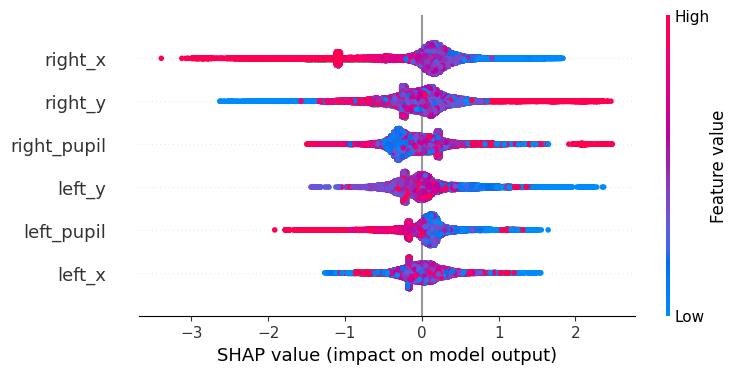

In [21]:
print(X.columns)
shap.plots.beeswarm(explanation[:, :, 1], max_display=20)

In [22]:
explanation[:,:,0]

.values =
array([[ 3.58502055e-01, -5.95462696e-01, -6.11003694e-02,
        -3.23907386e-01, -2.01722188e-01, -4.41073198e-02],
       [ 1.84322142e-01, -3.03175804e-01, -7.12799248e-02,
        -3.09022901e-01, -1.56856581e-01, -4.14752608e-03],
       [ 1.92682010e-01, -4.89845722e-04, -5.12555258e-02,
        -3.76495965e-01, -1.77349054e-01,  3.27311100e-02],
       ...,
       [ 6.10733840e-03,  1.27927310e-01, -2.21956480e-01,
         1.44135448e-01, -1.16510378e-01,  4.00206376e-01],
       [ 7.18281600e-02,  1.33508661e-01, -2.00556129e-01,
         1.27893625e-01, -1.28409861e-01,  3.82911684e-01],
       [ 1.23471653e-01,  1.32374723e-01, -1.88037236e-01,
         1.35206255e-01, -1.51685875e-01,  3.80591535e-01]])

.base_values =
array([-0.39388577, -0.39388577, -0.39388577, ..., -0.39388577,
       -0.39388577, -0.39388577])

.data =
array([[0.49136054, 0.27737495, 0.48051035, 0.27223498, 2.99650574,
        2.84646606],
       [0.49167308, 0.30325192, 0.48258239, 0.27887

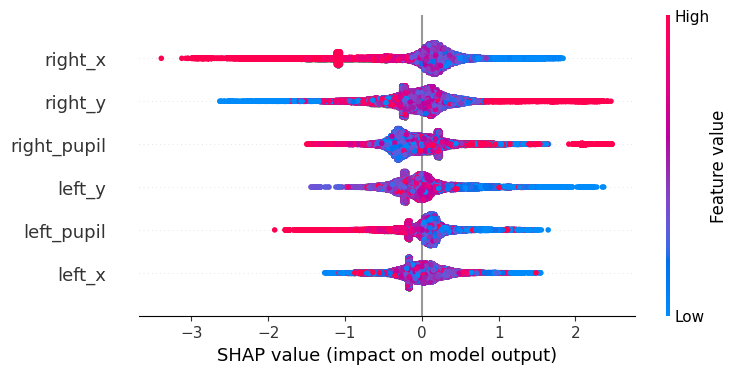

In [23]:
shap.plots.beeswarm(explanation[:,:,1], max_display=20)

In [24]:
# shap.plots.scatter(explanation[:, "left_pupil_std", 1], color=explanation[:, "right_pupil_std", 1])
shap.plots.scatter(explanation["CH5_std"], color=explanation["CH1_std"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [25]:
shap.plots.beeswarm(explanation[:,0].abs, color="shap_red")

IndexError: tuple index out of range

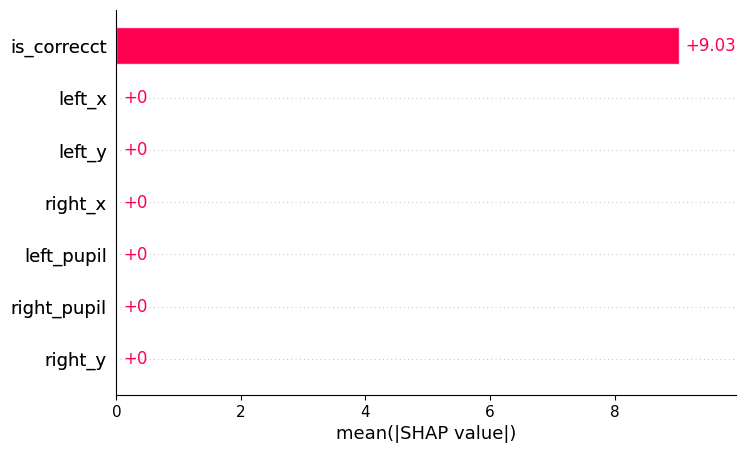

In [ ]:
shap.plots.bar(explanation[:, :, 1].abs.mean(0))

TypeError: 'numpy.float64' object is not iterable

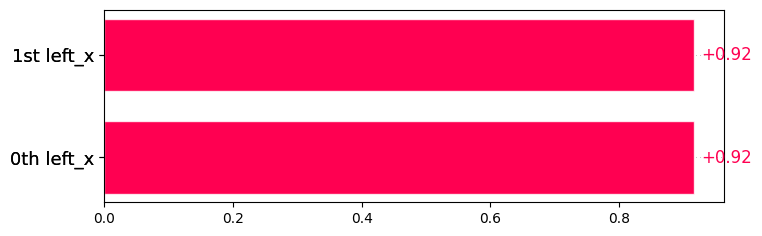

In [ ]:
shap.plots.bar(explanation[1])
shap.plots.bar(explanation[1].cohorts(2).abs.mean(0))

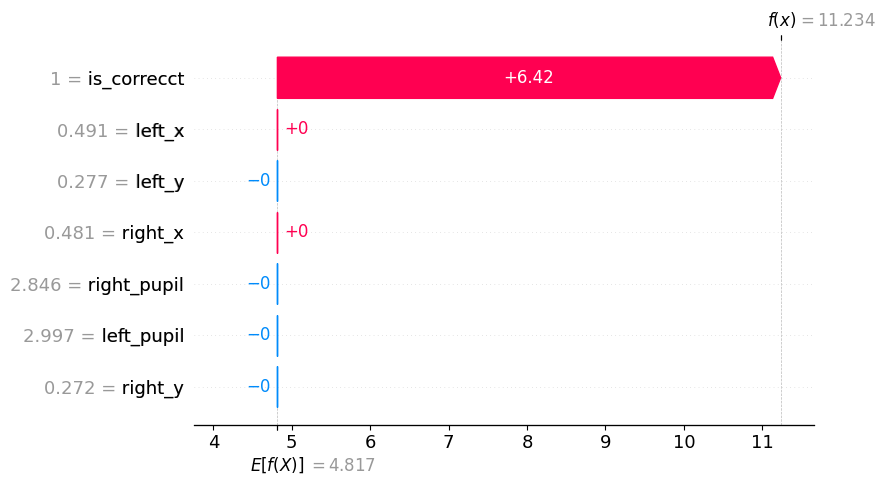

In [ ]:
shap.plots.waterfall(explanation[0, :, 1])